# Read the headers of the .csv files

In [1]:
import pandas as pd
from pathlib import Path

# Get all CSV files in datasets directory
datasets_dir = Path('datasets')
csv_files = sorted(datasets_dir.glob('*.csv'))

# Read and display headers for each CSV file
for csv_file in csv_files:
    print(f"\n{'='*50}")
    print(f"File: {csv_file.name}")
    print(f"{'='*50}")
    df = pd.read_csv(csv_file)
    print(f"Columns: {list(df.columns)}")
    print(f"Shape: {df.shape}")



File: countryid.csv
Columns: ['qg_telephonecountry', 'Country Name']
Shape: (83, 2)

File: crm_accounts_data.csv
Columns: ['@odata.etag', 'qg_annualrevenue_display', 'qg_annualrevenue', 'qg_naics2022', 'qg_numberofemployees_display', 'qg_numberofemployees', 'industrycode_display', 'industrycode', 'statuscode_display', 'statuscode', 'address1_country', 'accountid', 'name', 'qg_dandbstandardindustrycode', 'numberofemployees_display', 'numberofemployees', 'address2_country', '_transactioncurrencyid_value_display', '_transactioncurrencyid_value@Microsoft.Dynamics.CRM.associatednavigationproperty', '_transactioncurrencyid_value@Microsoft.Dynamics.CRM.lookuplogicalname', '_transactioncurrencyid_value', 'revenue_display', 'revenue', 'address1_composite', 'address2_composite']
Shape: (25000, 25)

File: dandbindustrycode.csv
Columns: ['industrycode', 'industrycode_display']
Shape: (46, 2)

File: industrycode.csv
Columns: ['industrycode', 'industrycode_display']
Shape: (46, 2)

File: qg_naics20

# Accounts description

In [4]:
# Preview the CRM accounts data
df_accounts = pd.read_csv('datasets/crm_accounts_data.csv')

print(f"Shape: {df_accounts.shape}")
print(f"\nFirst few rows:")
display(df_accounts.head())

print(f"\nData types:")
display(df_accounts.dtypes)


Shape: (25000, 25)

First few rows:


,@odata.etag,qg_annualrevenue_display,qg_annualrevenue,qg_naics2022,qg_numberofemployees_display,qg_numberofemployees,industrycode_display,industrycode,statuscode_display,statuscode,...,numberofemployees,address2_country,_transactioncurrencyid_value_display,_transactioncurrencyid_value@Microsoft.Dynamics.CRM.associatednavigationproperty,_transactioncurrencyid_value@Microsoft.Dynamics.CRM.lookuplogicalname,_transactioncurrencyid_value,revenue_display,revenue,address1_composite,address2_composite
0,"W/""3174088725""",A 0-20 Million,140300000.0,622110 - General Medical and Surgical Hospitals,C 101-250,140300002.0,Healthcare,777040050.0,Free Account,777040002,...,116.0,NaN,US Dollar,transactioncurrencyid,transactioncurrency,19e035c1-9869-e911-a965-000d3a4647a5,$0.00,0.0,United States,NaN
1,"W/""3062294832""",D >100-250 Million​,140300003.0,321219 - Reconstituted Wood Product Manufacturing,E 501-999,140300004.0,Manufacturing,777040002.0,Client,777040001,...,700.0,NaN,Euro,transactioncurrencyid,transactioncurrency,0deeb928-da07-e211-8af5-3c4a92dbd83d,NaN,NaN,United States,NaN
2,"W/""2849172306""",A 0-20 Million,140300000.0,313320 - Fabric Coating Mills,A 1-50,140300000.0,Manufacturing,777040002.0,Free Account,777040002,...,25.0,NaN,US Dollar,transactioncurrencyid,transactioncurrency,19e035c1-9869-e911-a965-000d3a4647a5,"$8,678,362.00",8678362.0,United States,NaN
3,"W/""2846277668""",A 0-20 Million,140300000.0,321920 - Wood Container and Pallet Manufacturing,A 1-50,140300000.0,Manufacturing,777040002.0,Free Account,777040002,...,8.0,NaN,US Dollar,transactioncurrencyid,transactioncurrency,19e035c1-9869-e911-a965-000d3a4647a5,"$3,338,299.00",3338299.0,United States,NaN
4,"W/""2851359963""",A 0-20 Million,140300000.0,327320 - Ready-Mix Concrete Manufacturing,A 1-50,140300000.0,Manufacturing,777040002.0,Free Account,777040002,...,45.0,NaN,US Dollar,transactioncurrencyid,transactioncurrency,19e035c1-9869-e911-a965-000d3a4647a5,"$6,626,209.00",6626209.0,United States,NaN



Data types:


@odata.etag                                                                          object
qg_annualrevenue_display                                                             object
qg_annualrevenue                                                                    float64
qg_naics2022                                                                         object
qg_numberofemployees_display                                                         object
qg_numberofemployees                                                                float64
industrycode_display                                                                 object
industrycode                                                                        float64
statuscode_display                                                                   object
statuscode                                                                            int64
address1_country                                                                

# Feature selection: EDA + baseline feature importances


Target distribution (value counts):


statuscode
777040002    22099
2             2491
777040000      289
777040001       96
1               25
Name: count, dtype: int64

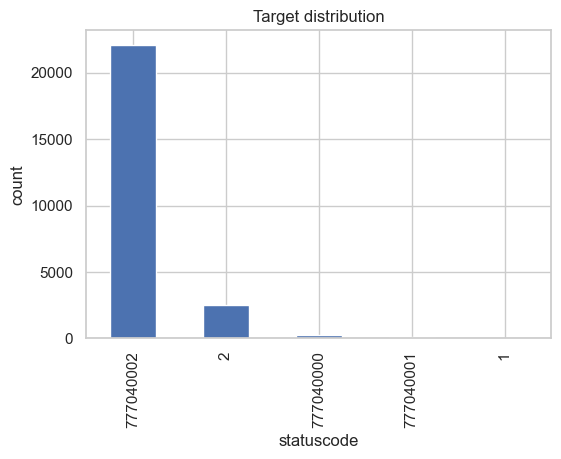


Top missing counts:


address2_composite                                                                  5000
qg_naics2022                                                                        1053
qg_dandbstandardindustrycode                                                        1005
address2_country                                                                     805
numberofemployees                                                                    183
numberofemployees_display                                                            183
revenue_display                                                                      165
revenue                                                                              165
industrycode                                                                          26
industrycode_display                                                                  26
qg_numberofemployees                                                                   3
qg_numberofemployees_


Data types:


@odata.etag                                                                          object
qg_annualrevenue_display                                                             object
qg_annualrevenue                                                                    float64
qg_naics2022                                                                         object
qg_numberofemployees_display                                                         object
qg_numberofemployees                                                                float64
industrycode_display                                                                 object
industrycode                                                                        float64
statuscode_display                                                                   object
statuscode                                                                            int64
address1_country                                                                


Initial candidate features: 23
After missingness filter (<50%): 23


Series([], dtype: float64)


Prepared X shape: (25000, 23), y shape: (25000,)

Top feature importances:


statuscode_display                                                                  0.354052
@odata.etag                                                                         0.172034
revenue                                                                             0.065412
qg_naics2022                                                                        0.055782
revenue_display                                                                     0.050244
qg_dandbstandardindustrycode                                                        0.048005
_transactioncurrencyid_value                                                        0.030209
numberofemployees_display                                                           0.028620
numberofemployees                                                                   0.027311
qg_annualrevenue_display                                                            0.026056
name                                                                  

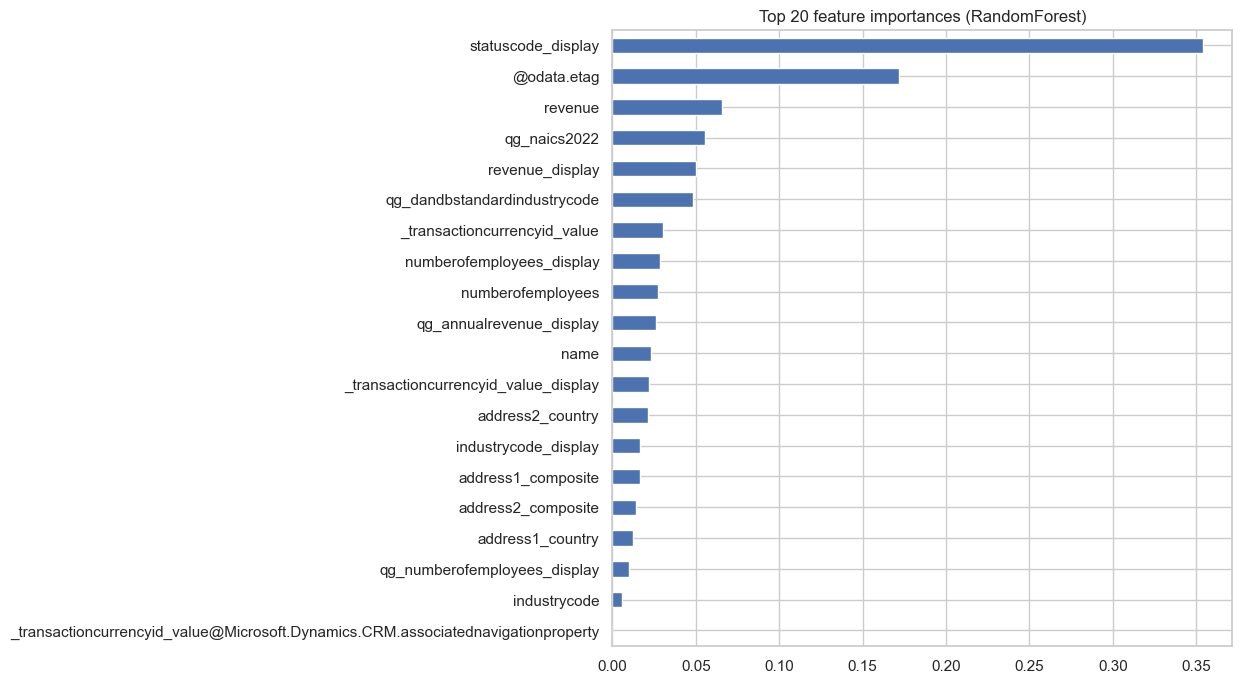


Candidate features (top 25% importance): 6


0              statuscode_display
1                     @odata.etag
2                         revenue
3                    qg_naics2022
4                 revenue_display
5    qg_dandbstandardindustrycode
Name: candidate_feature, dtype: object

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

sns.set(style='whitegrid')

# Load base table
df = pd.read_csv('datasets/crm_accounts_data.csv')
target = 'statuscode'

if target not in df.columns:
    print(f"Target column '{target}' not found. Columns: {list(df.columns)}")
else:
    print("\nTarget distribution (value counts):")
    display(df[target].value_counts(dropna=False))

    plt.figure(figsize=(6,4))
    df[target].value_counts(dropna=True).plot(kind='bar')
    plt.title('Target distribution')
    plt.ylabel('count')
    plt.show()

    print("\nTop missing counts:")
    display(df.isnull().sum().sort_values(ascending=False).head(30))

    print("\nData types:")
    display(df.dtypes)

    # Heuristic: exclude id/guid-like columns and the target
    exclude = [c for c in df.columns if c == target or c.lower().endswith('id') or c.lower().startswith('id') or 'guid' in c.lower() or 'uuid' in c.lower()]
    features = [c for c in df.columns if c not in exclude]
    print(f"\nInitial candidate features: {len(features)}")

    # Remove features with >50% missing values
    missing_frac = df[features].isnull().mean()
    features = list(missing_frac[missing_frac < 0.5].index)
    print(f"After missingness filter (<50%): {len(features)}")
    display(missing_frac[missing_frac >= 0.5].sort_values(ascending=False).head(20))

    # Prepare X, y
    X = df[features].copy()
    # Encode categorical object columns
    obj_cols = X.select_dtypes(include=['object','category']).columns.tolist()
    for col in obj_cols:
        X[col] = X[col].fillna('___NA___').astype(str)
        X[col] = LabelEncoder().fit_transform(X[col])

    # Impute numeric columns
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    if num_cols:
        X[num_cols] = SimpleImputer(strategy='median').fit_transform(X[num_cols])

    # Align target and drop rows with missing target
    y = df[target].copy()
    mask = y.notnull()
    X = X[mask]
    y = y[mask]

    # Basic sanity check
    print(f"\nPrepared X shape: {X.shape}, y shape: {y.shape}")

    # If too many features, limit visualization
    max_display = 50

    # Train a baseline RandomForest to get feature importances
    if len(X) > 10 and len(X.columns) > 0:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
        rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
        rf.fit(X_train, y_train)
        importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

        print('\nTop feature importances:')
        display(importances.head(max_display))

        plt.figure(figsize=(8, max(4, min(20, len(importances.head(20)) * 0.4))))
        importances.head(20).sort_values().plot(kind='barh')
        plt.title('Top 20 feature importances (RandomForest)')
        plt.show()

        # Candidate features: top 25% by importance
        threshold = importances.quantile(0.75)
        candidate_features = importances[importances > threshold].index.tolist()
        print(f"\nCandidate features (top 25% importance): {len(candidate_features)}")
        display(pd.Series(candidate_features, name='candidate_feature'))

    else:
        print('\nNot enough data or features to train baseline model. Inspect the prepared X and y.')
        display(X.head())


**Candidate Features Review**

The following cell inspects the candidate features found by the baseline model, warns about possible target leakage or identifier-like columns, and creates a small preprocessed DataFrame (`df_features`) containing the recommended features for modeling. The recommendations and rationale are printed alongside simple diagnostics.

Note: run the next code cell to execute the checks and transformations.

In [10]:
# Review and preprocess candidate features
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('datasets/crm_accounts_data.csv')

candidate_features = [
    'statuscode_display',
    '@odata.etag',
    'revenue',
    'qg_naics2022',
    'revenue_display',
    'qg_dandbstandardindustrycode'
]

print('Candidate features found:')
for c in candidate_features:
    if c in df.columns:
        nunique = df[c].nunique(dropna=True)
        miss = df[c].isnull().mean()
        print(f"- {c}: unique={nunique}, missing={miss:.2%}")
    else:
        print(f"- {c}: NOT FOUND in dataframe")

# Rationale and action plan:
# - '@odata.etag' looks like a version/identifier token -> DROP (likely unique, not predictive)
# - 'statuscode_display' is a human-readable label for the target -> POTENTIAL TARGET LEAKAGE -> DROP for modeling
# - 'revenue' numeric -> KEEP and impute
# - 'revenue_display' is likely a formatted string duplicate of 'revenue' -> DROP
# - 'qg_naics2022' and 'qg_dandbstandardindustrycode' are industry codes -> KEEP and encode

keep = []
if 'revenue' in df.columns:
    keep.append('revenue')
if 'qg_naics2022' in df.columns:
    keep.append('qg_naics2022')
if 'qg_dandbstandardindustrycode' in df.columns:
    keep.append('qg_dandbstandardindustrycode')

print('\nKept features for modeling (after dropping identifiers/leakage/duplicates):', keep)

# Build df_features with target if available
target = 'statuscode'
df_features = df[keep].copy()

# Impute revenue
if 'revenue' in df_features.columns:
    median_rev = df_features['revenue'].median()
    df_features['revenue'] = df_features['revenue'].fillna(median_rev)
    print(f"\nImputed 'revenue' missing values with median: {median_rev}")

# Encode categorical codes with LabelEncoder (suitable for tree-based models)
le_map = {}
for col in ['qg_naics2022', 'qg_dandbstandardindustrycode']:
    if col in df_features.columns:
        df_features[col] = df_features[col].fillna('___MISSING___').astype(str)
        le = LabelEncoder()
        df_features[col] = le.fit_transform(df_features[col])
        le_map[col] = dict(enumerate(le.classes_))
        print(f"Encoded {col}: classes={len(le.classes_)}")

# Attach target (unaltered) for quick checks
if target in df.columns:
    df_features[target] = df[target]
else:
    print(f"Warning: target '{target}' not found; df_features will not contain target.")

# Show a preview
print('\nPreview of preprocessed features:')
display(df_features.head())

# Save candidate features to CSV for reference
out_path = 'datasets/candidate_features_prepared.csv'
df_features.to_csv(out_path, index=False)
print(f"\nSaved preprocessed candidate features to '{out_path}'")

# Print final recommendations
print('\nRecommendations:')
print('- Exclude `statuscode_display` and `@odata.etag` from training to avoid leakage/irrelevant identifiers.')
print('- Use `revenue` (numeric) and the industry codes; for high-cardinality codes consider target encoding or frequency encoding if needed.')
print('- For tree models: Label encoding is fine; for linear models use one-hot / sparse encoding or embedding.')
print('- Re-evaluate feature importances with the baseline model after these transforms.')


Candidate features found:
- statuscode_display: unique=5, missing=0.00%
- @odata.etag: unique=25000, missing=0.00%
- revenue: unique=19595, missing=0.66%
- qg_naics2022: unique=891, missing=4.21%
- revenue_display: unique=19609, missing=0.66%
- qg_dandbstandardindustrycode: unique=4418, missing=4.02%

Kept features for modeling (after dropping identifiers/leakage/duplicates): ['revenue', 'qg_naics2022', 'qg_dandbstandardindustrycode']

Imputed 'revenue' missing values with median: 215881948.0
Encoded qg_naics2022: classes=892
Encoded qg_dandbstandardindustrycode: classes=4419

Preview of preprocessed features:


,revenue,qg_naics2022,qg_dandbstandardindustrycode,statuscode
0,0.0,787,4024,777040002
1,215881948.0,169,841,777040001
2,8678362.0,151,718,777040002
3,3338299.0,173,834,777040002
4,6626209.0,247,1424,777040002



Saved preprocessed candidate features to 'datasets/candidate_features_prepared.csv'

Recommendations:
- Exclude `statuscode_display` and `@odata.etag` from training to avoid leakage/irrelevant identifiers.
- Use `revenue` (numeric) and the industry codes; for high-cardinality codes consider target encoding or frequency encoding if needed.
- For tree models: Label encoding is fine; for linear models use one-hot / sparse encoding or embedding.
- Re-evaluate feature importances with the baseline model after these transforms.


# Train XGBoost classifier

This cell trains an XGBoost classifier on the prepared candidate features (`datasets/candidate_features_prepared.csv`). It evaluates the model (accuracy, classification report, confusion matrix), shows feature importances, and saves the trained model, label encoder, and feature list into the `models/` directory.

XGBoost import failed: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <636BF463-1886-392D-B8B3-6011C44DCEE9> /opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/op

/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/Caskroom/miniconda/base/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

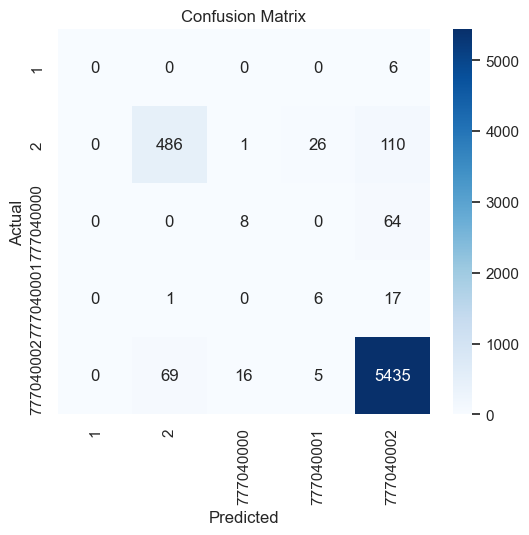


Feature importances:


revenue                         0.449964
qg_dandbstandardindustrycode    0.283902
qg_naics2022                    0.266133
dtype: float64

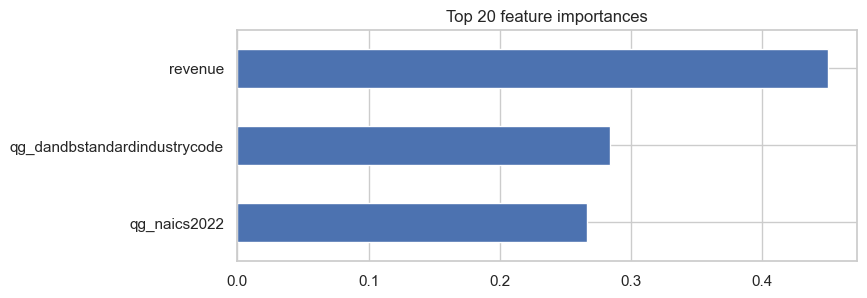

Saved model and artifacts to models (model file: models/random_forest_status_model.pkl)


In [14]:
# Train and evaluate XGBoost classifier (fallback to RandomForest if XGBoost fails to load)
import sys
import subprocess
from pathlib import Path
import json

# Try to import xgboost; if it fails due to missing libomp or load error, fall back to RandomForest
use_xgb = False
try:
    import xgboost as xgb
    use_xgb = True
except Exception as e:
    print('XGBoost import failed:', e)
    print('\nCommon fix on macOS: install OpenMP runtime:')
    print('  brew install libomp')
    print('\nFalling back to scikit-learn RandomForestClassifier for training.')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set(style='whitegrid')

# Paths
data_path = Path('datasets/candidate_features_prepared.csv')
if not data_path.exists():
    raise FileNotFoundError(f"Prepared candidate features not found at {data_path}. Run the preprocessing cell first.")

# Load data
df = pd.read_csv(data_path)
if 'statuscode' not in df.columns:
    raise ValueError("Target column 'statuscode' not found in prepared dataset.")

X = df.drop(columns=['statuscode']).copy()
y = df['statuscode'].astype(str).copy()

# Encode target
le_y = LabelEncoder()
y_enc = le_y.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.25, random_state=42, stratify=y_enc)

model = None
model_name = None

if use_xgb:
    try:
        model = xgb.XGBClassifier(n_estimators=200, random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss')
        model.fit(X_train, y_train)
        model_name = 'xgboost'
    except Exception as e:
        print('XGBoost failed at runtime:', e)
        print('Falling back to RandomForestClassifier.')
        model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced')
        model.fit(X_train, y_train)
        model_name = 'random_forest'
else:
    model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced')
    model.fit(X_train, y_train)
    model_name = 'random_forest'

# Predict + evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model used: {model_name}")
print(f"Accuracy: {acc:.4f}")
print('\nClassification report:')
print(classification_report(y_test, y_pred, target_names=le_y.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_y.classes_, yticklabels=le_y.classes_)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()

# Feature importances
try:
    feat_imp = pd.Series(getattr(model, 'feature_importances_', None), index=X.columns).sort_values(ascending=False)
except Exception:
    # some models (older xgboost) expose feature_importances_ differently; try attribute access
    try:
        feat_imp = pd.Series(model.get_booster().get_score(importance_type='weight'), name='importance')
        feat_imp.index = feat_imp.index
        feat_imp = feat_imp.sort_values(ascending=False)
    except Exception:
        feat_imp = pd.Series([], dtype=float)

if not feat_imp.empty:
    print('\nFeature importances:')
    display(feat_imp)
    plt.figure(figsize=(8, max(3, min(20, len(feat_imp.head(20))) * 0.35)))
    feat_imp.head(20).sort_values().plot(kind='barh')
    plt.title('Top 20 feature importances')
    plt.show()
else:
    print('\nCould not compute feature importances for this model.')

# Save artifacts
art_dir = Path('models')
art_dir.mkdir(exist_ok=True)
model_file = art_dir / f'{model_name}_status_model.pkl'
joblib.dump(model, model_file)
joblib.dump(le_y, art_dir / 'label_encoder_status.pkl')
with open(art_dir / 'feature_list.json', 'w') as fh:
    json.dump(list(X.columns), fh)
if not feat_imp.empty:
    feat_imp.to_csv(art_dir / 'feature_importances.csv')

print(f"Saved model and artifacts to {art_dir} (model file: {model_file})")
